# Group Project

In [111]:
import pandas as pd
import numpy as np
import os
import glob
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn
import sklearn
from shapely.geometry import Point, Polygon
seaborn.set()
# numpy pandas shapely geopandas rasterio
cwd_path = os.getcwd()
usa_quake_path = cwd_path + "\\earthquake_contiguous_usa_12batch\\"
eu_quake_path = cwd_path + "\\Earthquake_2016_2018_all_eu\\"

# Assignment understanding
Note for reading the data.
Each csv is organized into two month intervals. 
It goes as follows

2020: sep - oct, nov - dec

2021: jan - feb, march - april, may - june, july - august, sep - oct, nov - dec

2022: jan - feb, march - april, may - june, july - august,

We are asked to split these 12 batches into '3 wide windows' 012, 123, 234, 345, and so on.

In [83]:
# Used to enumerate the files in each directory.
# Useful for finding a sepcific file's index for the us_df[] and eu_df[] arrays/list

for x, us in enumerate(glob.glob(usa_quake_path+"*.csv")):
    print("%2i %s" % (x,os.path.basename(us)))
print()
for x, eu in enumerate(glob.glob(eu_quake_path+"*.csv")):
    print("%2i %s" % (x,os.path.basename(eu)))

 0 Earthquake_2020_09_2020_10_filtered.csv
 1 Earthquake_2020_11_2020_12_filtered.csv
 2 Earthquake_2021_01_2021_02_filtered.csv
 3 Earthquake_2021_03_2021_04_filtered.csv
 4 Earthquake_2021_05_2021_06_filtered.csv
 5 Earthquake_2021_07_2021_08_filtered.csv
 6 Earthquake_2021_09_2021_10_filtered.csv
 7 Earthquake_2021_11_2021_12_filtered.csv
 8 Earthquake_2022_01_2022_02_filtered.csv
 9 Earthquake_2022_03_2022_04_filtered.csv
10 Earthquake_2022_05_2022_06_filtered.csv
11 Earthquake_2022_07_2022_08_filtered.csv

 0 Earthquake_2016_10_filtered_eu.csv
 1 Earthquake_2016_11_filtered_eu.csv
 2 Earthquake_2016_12_filtered_eu.csv
 3 Earthquake_2016_1_filtered_eu.csv
 4 Earthquake_2016_2_filtered_eu.csv
 5 Earthquake_2016_3_filtered_eu.csv
 6 Earthquake_2016_4_filtered_eu.csv
 7 Earthquake_2016_5_filtered_eu.csv
 8 Earthquake_2016_6_filtered_eu.csv
 9 Earthquake_2016_7_filtered_eu.csv
10 Earthquake_2016_8_filtered_eu.csv
11 Earthquake_2016_9_filtered_eu.csv
12 Earthquake_2017_10_filtered_eu.cs

In [85]:
# CSVs are appended to an array/list as DataFames.
# Done for both US and EU data
us_df = []
eu_df = []
for us in glob.glob(usa_quake_path+"*.csv"):
    us_df.append(pd.read_csv(us))


for eu in glob.glob(eu_quake_path+"*.csv"):
    eu_df.append(pd.read_csv(eu))


In [86]:
# Batch allocation
us_batches = []
iterator = 0
for y in range(10):
    batch = pd.concat((us_df[y+0], us_df[y+1], us_df[y+2]),ignore_index=True)
    us_batches.append(batch)
print(len(us_batches))
print(us_batches)

10
[                          time   latitude   longitude      depth   mag
0     2020-09-01T00:30:52.227Z  38.176500 -117.801900   6.700000  3.50
1     2020-09-01T00:36:59.811Z  38.003900 -118.235800   6.600000  3.40
2     2020-09-01T01:39:34.960Z  36.394333 -120.437000   9.190000  2.87
3     2020-09-01T02:25:49.130Z  42.370000 -118.444000   8.450000  3.52
4     2020-09-01T05:51:36.757Z  38.179800 -117.863400   9.200000  3.30
...                        ...        ...         ...        ...   ...
1649  2021-02-28T20:12:49.320Z  34.326167 -116.923500   5.510000  2.94
1650  2021-02-28T20:56:22.890Z  32.068176 -102.241449   8.779256  3.20
1651  2021-02-28T21:38:38.590Z  36.363167  -98.155333   7.220000  3.68
1652  2021-02-28T22:00:42.397Z  31.688448 -104.300805   6.568604  3.20
1653  2021-02-28T23:32:57.854Z  38.169400 -117.898600  11.600000  2.80

[1654 rows x 5 columns],                           time   latitude   longitude      depth   mag
0     2020-11-01T00:47:37.474Z  31.606700 -104.

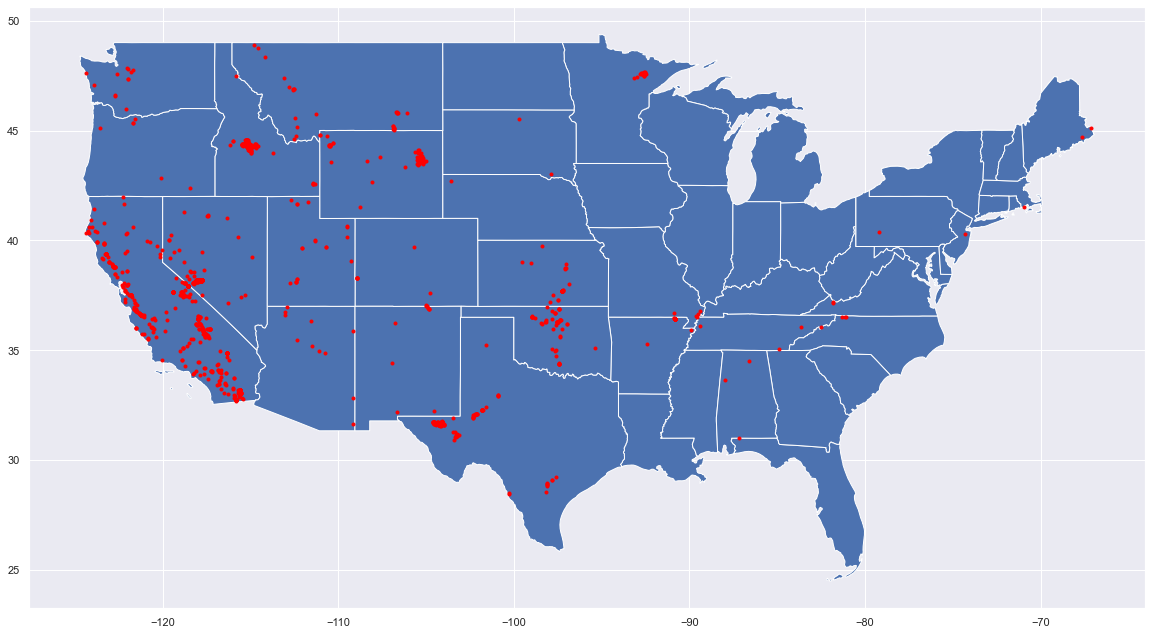

In [124]:
plt.rcParams["figure.figsize"] = [20, 20]
states = gpd.read_file('data/usa-states-census-2014.shp')
states.plot()
plt.scatter(us_batches[0].longitude, us_batches[0].latitude,c="red",marker='.')

# TA demo code
Here, I followed the TA demo an yoinked most of the code so we can see how it works.

<AxesSubplot:>

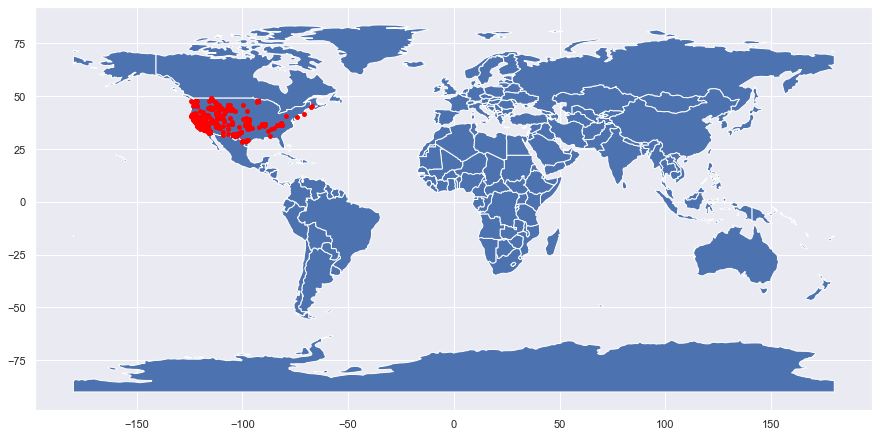

In [75]:
from shapely.geometry import Point

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
points= [Point(xy) for xy in zip(us_batches[0].longitude, us_batches[0].latitude)]
allPoints = gpd.GeoDataFrame(us_batches[0], geometry=points)
allPoints.plot(ax=world.plot(figsize=(15,8)), marker='o', color='red', markersize=15)

#geo_all = [Point(xy) for xy in zip(df_plot_all.longitude, df_plot_all.latitude)]


In [43]:
us_batches[0]

,time,latitude,longitude,depth,mag,geometry
0,2020-09-01T00:30:52.227Z,38.176500,-117.801900,6.700000,3.50,POINT (-117.80190 38.17650)
1,2020-09-01T00:36:59.811Z,38.003900,-118.235800,6.600000,3.40,POINT (-118.23580 38.00390)
2,2020-09-01T01:39:34.960Z,36.394333,-120.437000,9.190000,2.87,POINT (-120.43700 36.39433)
3,2020-09-01T02:25:49.130Z,42.370000,-118.444000,8.450000,3.52,POINT (-118.44400 42.37000)
4,2020-09-01T05:51:36.757Z,38.179800,-117.863400,9.200000,3.30,POINT (-117.86340 38.17980)
...,...,...,...,...,...,...
431,2021-02-28T20:12:49.320Z,34.326167,-116.923500,5.510000,2.94,POINT (-116.92350 34.32617)
432,2021-02-28T20:56:22.890Z,32.068176,-102.241449,8.779256,3.20,POINT (-102.24145 32.06818)
433,2021-02-28T21:38:38.590Z,36.363167,-98.155333,7.220000,3.68,POINT (-98.15533 36.36317)
434,2021-02-28T22:00:42.397Z,31.688448,-104.300805,6.568604,3.20,POINT (-104.30081 31.68845)


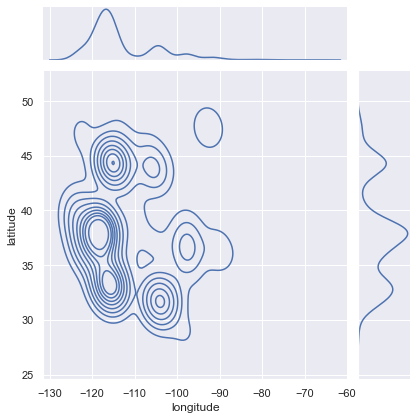

In [45]:
long_lat = us_batches[0][['latitude','longitude']]
seaborn.jointplot(x="longitude",y="latitude",data=long_lat, kind="kde")

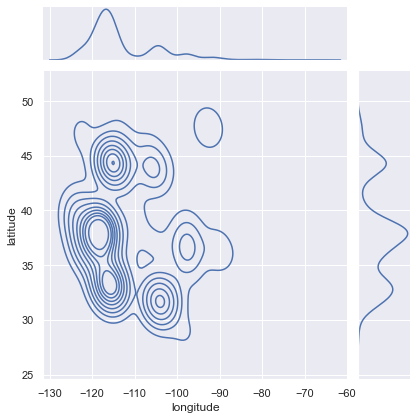

In [48]:
df_large = us_batches[0][us_batches[0]['mag'] >= 2.5]
df_large = df_large[['latitude','longitude']]
seaborn.jointplot(x="longitude",y="latitude",data=df_large, kind="kde")

In [49]:
xgrid100 = np.sort(list(df_large['longitude']))
ygrid100 = np.sort(list(df_large['latitude']))
x100, y100 = np.meshgrid(xgrid100, ygrid100)
print("X grid: \n",x100)
print("X grid: \n",y100)

X grid: 
 [[-124.38033333 -124.3585     -124.2291667  ...  -70.9546
   -67.6285      -67.1595    ]
 [-124.38033333 -124.3585     -124.2291667  ...  -70.9546
   -67.6285      -67.1595    ]
 [-124.38033333 -124.3585     -124.2291667  ...  -70.9546
   -67.6285      -67.1595    ]
 ...
 [-124.38033333 -124.3585     -124.2291667  ...  -70.9546
   -67.6285      -67.1595    ]
 [-124.38033333 -124.3585     -124.2291667  ...  -70.9546
   -67.6285      -67.1595    ]
 [-124.38033333 -124.3585     -124.2291667  ...  -70.9546
   -67.6285      -67.1595    ]]
X grid: 
 [[28.4727    28.4727    28.4727    ... 28.4727    28.4727    28.4727   ]
 [28.5067749 28.5067749 28.5067749 ... 28.5067749 28.5067749 28.5067749]
 [28.5638    28.5638    28.5638    ... 28.5638    28.5638    28.5638   ]
 ...
 [48.3456    48.3456    48.3456    ... 48.3456    48.3456    48.3456   ]
 [48.7652    48.7652    48.7652    ... 48.7652    48.7652    48.7652   ]
 [48.8828    48.8828    48.8828    ... 48.8828    48.8828    48.8828  

In [63]:
xy100 = np.vstack([y100.ravel(),x100.ravel()]).T
print(xy100[:,0])
print(xy100[:,1])



[28.4727 28.4727 28.4727 ... 48.8828 48.8828 48.8828]
[-124.38033333 -124.3585     -124.2291667  ...  -70.9546      -67.6285
  -67.1595    ]


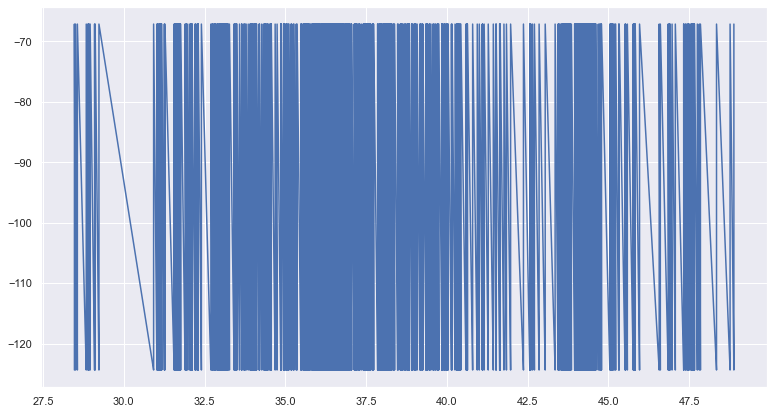

<AxesSubplot:>

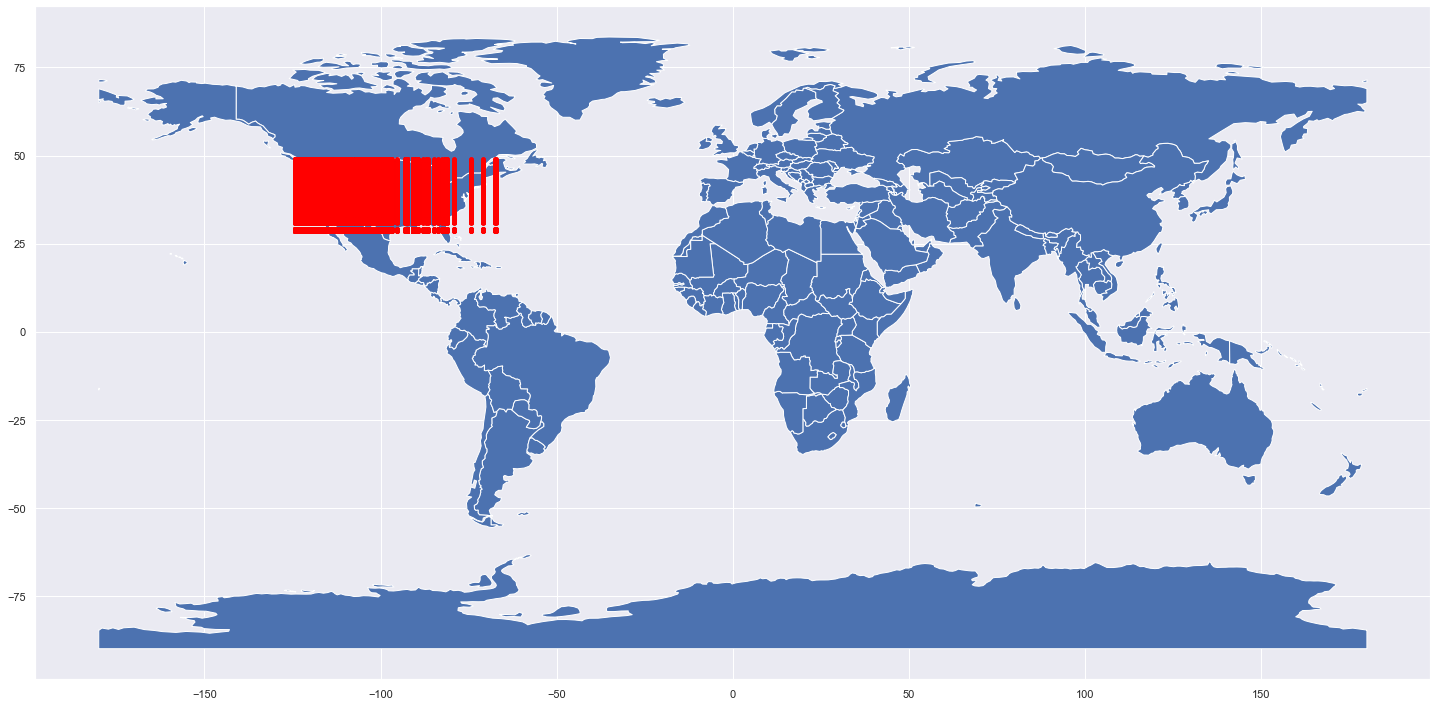

In [51]:
# dont run this unless you have a few minutes
from shapely.geometry import Point

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

points= [Point(xy) for xy in zip(xy100[:,1], xy100[:,0])]
allPoints = gpd.GeoDataFrame(xy100, geometry=points)

allPoints.plot(ax=world.plot(figsize=(25,18)), marker='o', color='red', markersize=15)

#geo_all = [Point(xy) for xy in zip(df_plot_all.longitude, df_plot_all.latitude)]


# testing from websites

In [18]:
# Ant code
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5).fit(xy100)
neigh_dist, neigh_ind = nbrs.kneighbors(xy100)
sort_neigh_dist  = np.sort(neigh_dist, axis=0)

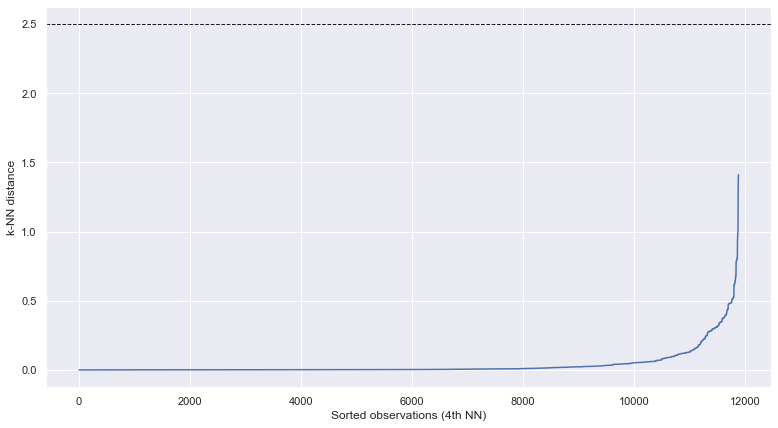

In [21]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()


In [23]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=2.5, min_samples=4).fit(xy100)
# get cluster labels
clusters.labels_
# output
#array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

# check unique clusters
set(clusters.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, -1}
# -1 value represents noisy points could not assigned to any cluster

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22}

In [24]:
from collections import Counter
Counter(clusters.labels_)
# output
Counter({1: 1501, 0: 834, 2: 703, 3: 285, 7: 283, 5: 245, 6: 232, 4: 145, 12: 46, -1: 34, 11: 13, 8: 11, 9: 11, 14: 10, 15: 8, 17: 8, 13: 6, 10: 5, 18: 5, 19: 5, 22: 4, 16: 4, 20: 4, 21: 4})


Counter({1: 1501,
         0: 834,
         2: 703,
         3: 285,
         7: 283,
         5: 245,
         6: 232,
         4: 145,
         12: 46,
         -1: 34,
         11: 13,
         8: 11,
         9: 11,
         14: 10,
         15: 8,
         17: 8,
         13: 6,
         10: 5,
         18: 5,
         19: 5,
         22: 4,
         16: 4,
         20: 4,
         21: 4})

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data=xy100, x="longitude", y="latitude", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()


ValueError: Could not interpret value `longitude` for parameter `x`

In [157]:
from sklearn import neighbors

kde100 = sklearn.neighbors.KernelDensity(
bandwidth = 1,
metric = 'minkowski',
kernel = 'gaussian',
algorithm = 'ball_tree')
kde100.fit(df_large.values)

KernelDensity(algorithm='ball_tree', bandwidth=1, metric='minkowski')

In [158]:
# This takes a while, be careful
log_density = kde100.score_samples(xy100)
density = np.exp(log_density)
density = density.reshape(x100.shape)
print(density.shape)

ValueError: cannot reshape array of size 342225 into shape (633,633)

In [70]:
!pip install --upgrade matplotlib
!pip install basemap
!pip install basemap-data


In [71]:
fig1 = plt.figure(figsize=(15,15))

the_map = mpl_toolkits.basemap.Basemap(
    projection = 'cyl',
    llcrnrlat=y100.min()-5, urcrnrlat=y100.max()+5,
    llcrnrlot=x100.min()-5, urcrnrlot=x100.max()+5,
    resolution='c')

AttributeError: module 'mpl_toolkits' has no attribute 'basemap'

<Figure size 1080x1080 with 0 Axes>